# Wind Turbine Performance Analysis and Prediction

## **Project Aim:**

The goal of this project is to analyze the performance of wind turbines by predicting their operational status based on their measured power output compared to the theoretical power curve. By leveraging machine learning techniques, we aim to build models that can accurately classify turbine performance, identifying when turbines are operating near or far from their expected output. This can help in diagnosing underperformance or inefficiencies and assist in optimizing turbine maintenance and performance.

---

## **What Was Done:**

### **1. Data Preparation:**
The dataset was first cleaned and preprocessed, which involved:
- Handling missing values and outliers
- Ensuring the correct format for key columns
- Extracting relevant features such as wind speed, turbine power output, and theoretical power

---

### **2. Feature Engineering:**
New features were created, including:
- **Lag features** (`Wind_Lag1`, `Wind_Lag7`): These capture the temporal dependencies in the data and help the models understand how past performance might influence current output.

---

### **3. Model Building:**
Various machine learning models were implemented, including:
- **Logistic Regression**
- **Random Forest Classifier**
- **Gradient Boosting Classifier**
- **Support Vector Machines (SVM)**
- **K-Nearest Neighbors (KNN)**

These models were trained on the training set and tested on the test set to predict the turbine’s operational status (`turbine_status`).

---

### **4. Model Evaluation:**
For each model, we evaluated performance using:
- **Accuracy**
- **Precision, Recall, and F1 Score**
- **Confusion Matrix**
- **ROC Curve** for multi-class classification.

---

### **5. Hyperparameter Tuning:**
Hyperparameter tuning was performed for the **Random Forest** model using **grid search**, optimizing parameters like the number of estimators and tree depth to improve model performance.

---

### **6. Feature Importance Analysis:**
Using **Random Forest** and **Gradient Boosting**, we assessed feature importance to understand which variables were most influential in predicting turbine status.

---

## **Expected Results:**

We expected the models to classify turbine operational status with high precision and recall. We anticipated that non-linear models such as **Random Forest** and **Gradient Boosting** would outperform linear models like **Logistic Regression** or **SVM with linear kernels**. Hyperparameter optimization was expected to further improve the model's accuracy and interpretability.

---

## **Comments and Suggestions:**

- **Model Performance:**
  - While models like **Random Forest** and **Gradient Boosting** performed well, further optimization could still improve their performance.
  - Simpler models, like **Logistic Regression**, had lower performance due to their inability to capture complex relationships.

- **Feature Engineering:**
  - Additional features such as **turbine maintenance history** and **environmental factors** could improve model performance.
  - Incorporating **wind direction** and **geographical location** may add further value.

- **Future Directions:**
  - **Real-Time Prediction**: Implementing a real-time prediction system to monitor turbines and flag underperforming turbines for maintenance or optimization.
  - **Data Augmentation**: Exploring the integration of more granular data could further enhance prediction accuracy.
  - **Model Deployment**: Deploying models to cloud-based platforms for real-time turbine monitoring and maintenance alerts.

---

## **Conclusion:**

This project demonstrates the application of machine learning models in renewable energy analysis, specifically for wind turbine performance. The models help predict turbine status based on the deviation between measured and theoretical power, allowing for more efficient turbine management. Future improvements in feature engineering and model deployment could lead to more accurate predictions and real-time turbine monitoring.

---

## **Code Section:**
### Importing Libraries and Data Preprocessing

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load your dataset
df = pd.read_csv("your_data.csv")

# Handle missing values, outliers, and format key columns
df = df.dropna(subset=['LV ActivePower (kW)', 'Theoretical_Power_Curve (KWh)'])
df['Date'] = pd.to_datetime(df['Date'])

# Feature engineering: creating lag features
df['Wind_Lag1'] = df['Wind'].shift(1)
df['Wind_Lag7'] = df['Wind'].shift(7)
df.dropna(inplace=True)

# Define the target and features
X = df.drop(columns=['turbine_status'])
y = df['turbine_status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# 1. Dataset Overview

##   Columns:
- Date/Time: Timestamp (10-minute intervals).
- LV ActivePower (kW): Power generated by the turbine.
- Wind Speed (m/s): Measured at hub height.
- Theoretical_Power_Curve (kW): Expected power under ideal conditions.
- Wind Direction (°): Meteorological direction (0° = North, 90° = East, etc.).
- Goal: Predict power output, detect anomalies, or validate turbine performance.

# 2. Loading and Inspecting the Data



In [176]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Data/T1.csv')  # Replace with your file path
df.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [177]:
df.columns = df.columns.str.strip()
df.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [178]:
#df.head()
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)

In [179]:
# Preview data
#df.head()
df.describe()
 

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


## 3. Data Cleaning

 

In [180]:
print(df.isnull().sum())
#df.interpolate(method='time', inplace=True)


LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64


In [181]:
negative_power = df[df['LV ActivePower (kW)'] < 0]
num_negative_power = len(negative_power) 
num_negative_power

57

In [182]:
for col in df.select_dtypes(include=['number']).columns:
    num_negative =  (df[col]< 0).sum()
    print(f"Column         '{col}' has '{num_negative}' negative values.")
     

Column         'LV ActivePower (kW)' has '57' negative values.
Column         'Wind Speed (m/s)' has '0' negative values.
Column         'Theoretical_Power_Curve (KWh)' has '0' negative values.
Column         'Wind Direction (°)' has '0' negative values.


In [183]:
df =  df[(df['Wind Speed (m/s)'] >0 ) & (df['LV ActivePower (kW)'] >=0)]
df.head(5)

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


# 4. Explorat ry Data Analysis (EDA)



## A. Power Curve Analysis

-     Compare actual vs. theoretical power output:

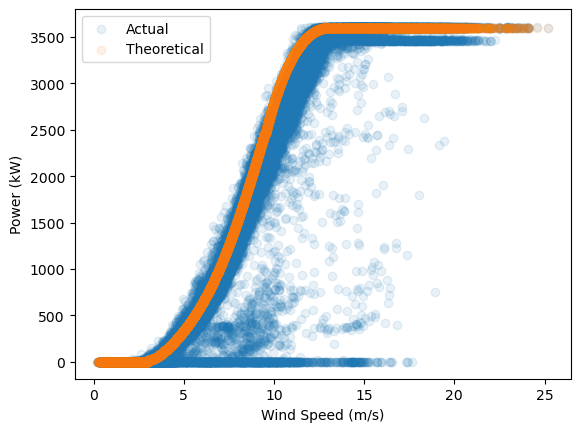

In [184]:
plt.scatter(df['Wind Speed (m/s)'], df['LV ActivePower (kW)'], alpha=0.1, label='Actual')
plt.scatter(df['Wind Speed (m/s)'], df['Theoretical_Power_Curve (KWh)'], alpha=0.1, label='Theoretical')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()

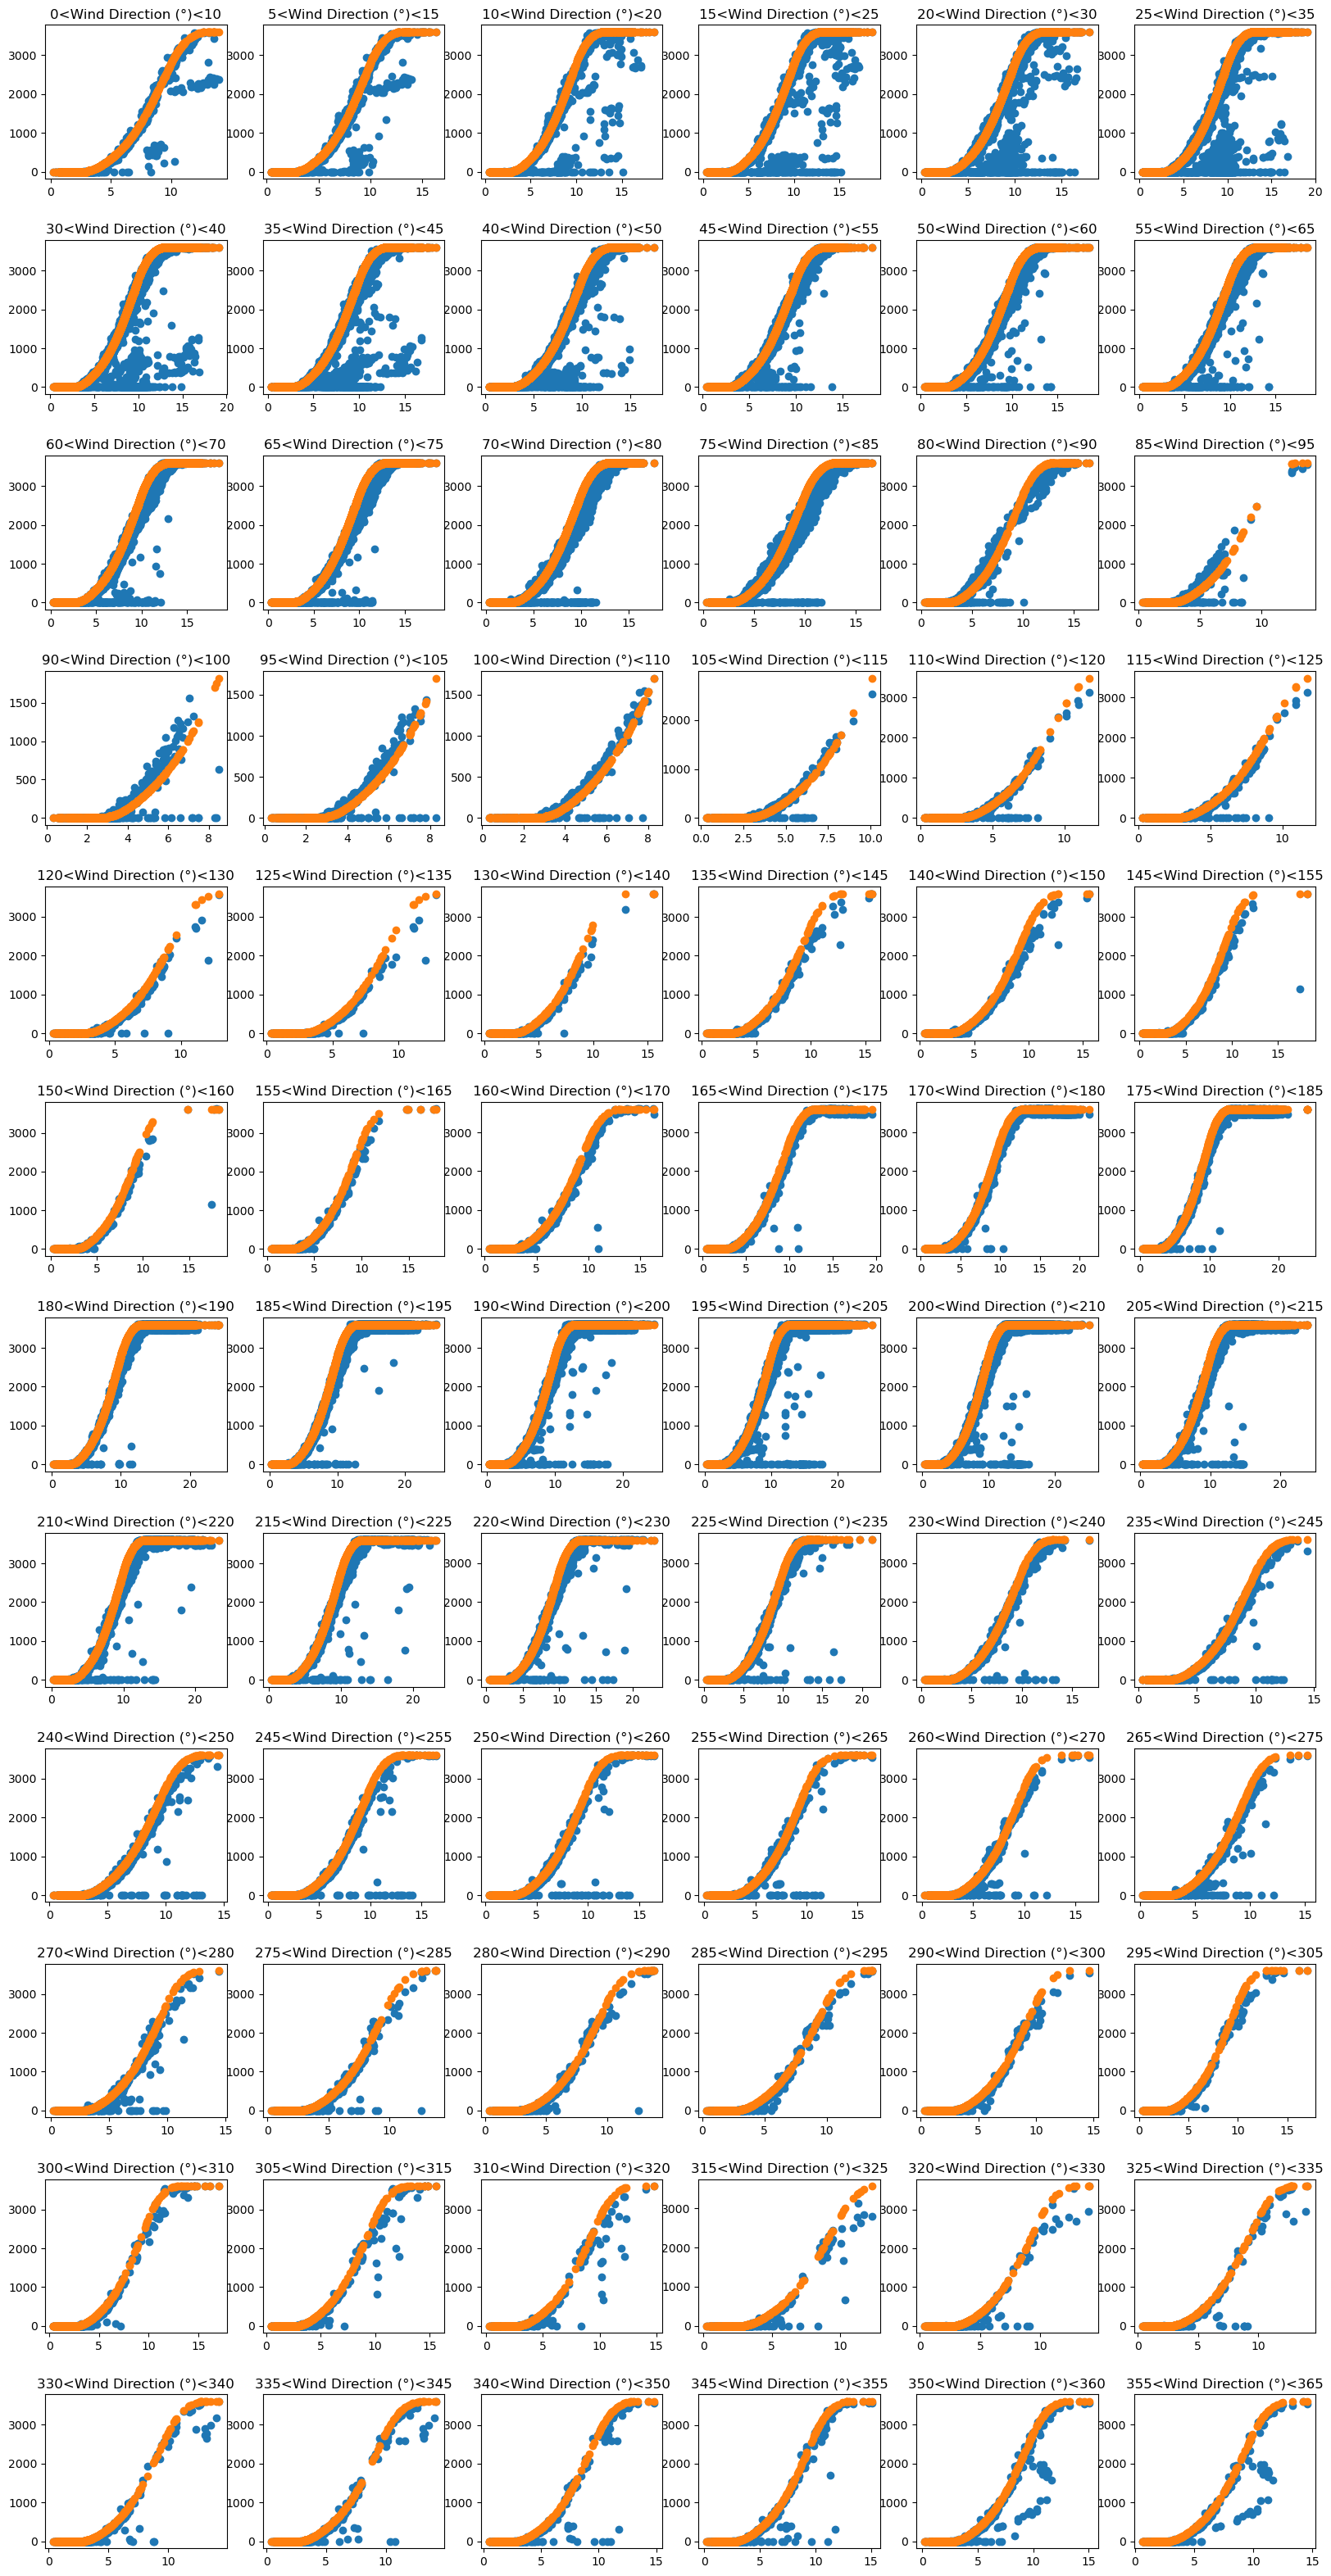

In [186]:
n = 0
plt.figure(figsize=(20,40))
for i in range(0,360,5):
    condition = (df['Wind Direction (°)']>i) & (df['Wind Direction (°)']<i+10)
    n += 1; fig = plt.subplot(12, 6, n)  # Subplot indexing starts from 1
    fig.scatter(df.loc[condition,'Wind Speed (m/s)'],df.loc[condition,'LV ActivePower (kW)'])
    fig.scatter(df.loc[condition,'Wind Speed (m/s)'],df.loc[condition,'Theoretical_Power_Curve (KWh)'])
    fig.set_title(f'{i}<Wind Direction (°)<{(i+10)}')
    plt.subplots_adjust(hspace=0.4)
plt.show()

The scatter plot compares actual and theoretical power outputs of a wind turbine against wind speed:

### Key Elements:
- **Axes:**
  - X-axis: Wind speed in meters per second (m/s).
  - Y-axis: Power in kilowatts (kW).

- **Data Points:**
  - Blue points: Actual measured power output, labeled 'Actual'.
  - Orange points: Theoretical power output, labeled 'Theoretical'.

### Observations:
- **Trends:**
  - Both actual and theoretical power outputs increase with wind speed, but actual data displays higher variability.
  - The theoretical output follows a smooth curve, plateauing at higher speeds, indicating a maximum power output limit.
  - The actual output diverges from the theoretical, suggesting real-world inefficiencies and environmental impacts.

### Insights on Choosing Best Conditions:
- **Pattern Identification:**
  - Select subplots where actual power aligns or exceeds the theoretical curve consistently across wind speeds.

- **Direction and Speed Consideration:**
  - Identify wind direction ranges that yield the highest and most consistent power outputs.

- **Efficiency Assessment:**
  - Focus on subplots where actual power closely follows the theoretical curve.

- **Anomaly Detection:**
  - Be cautious of significant deviations, as these may suggest unfavorable conditions.

### Conclusion:
The graph visualizes how real-world performance contrasts with theoretical predictions, suggesting targets for optimization by focusing on specific wind conditions where the actual output closely tracks the theoretical predictions. 

## B. Wind Direction Distribution



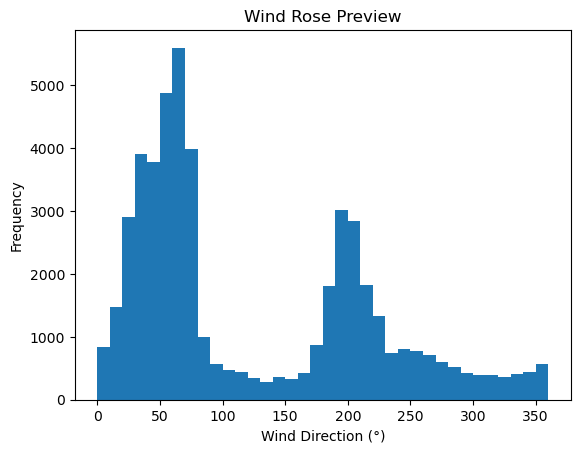

In [131]:
plt.hist(df['Wind Direction (°)'], bins=36)
plt.xlabel('Wind Direction (°)')
plt.ylabel('Frequency')
plt.title('Wind Rose Preview')
plt.show()

Text(0.5, 0, 'Wind Speed (m/s)')

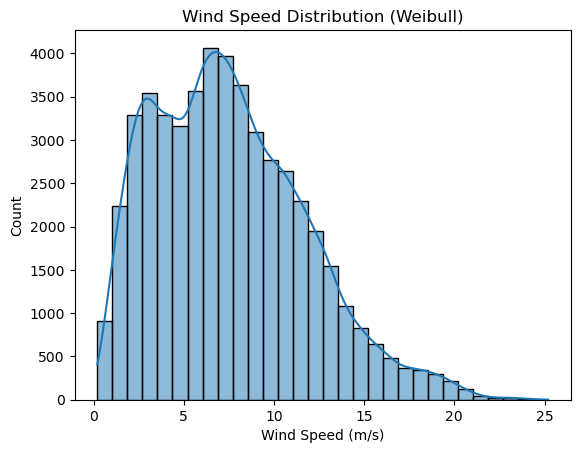

In [132]:
import seaborn as sns

# Wind speed distribution
sns.histplot(df['Wind Speed (m/s)'], kde=True, bins=30)
plt.title('Wind Speed Distribution (Weibull)')
plt.xlabel('Wind Speed (m/s)')



### Histogram:

   - X-axis: Wind Speed in meters per second (m/s).
   - Y-axis: Count of occurrences for each speed range.
   - Shape of distribution: Positively skewed, typical for a Weibull distribution, with a peak around 6 m/s and a long tail decreasing past 10 m/s.

This visualization helps understand the most common wind speeds and how they are distributed, useful for applications in fields like meteorology or renewable energy.

Text(0.5, 1.0, 'Wind Rose Diagram')

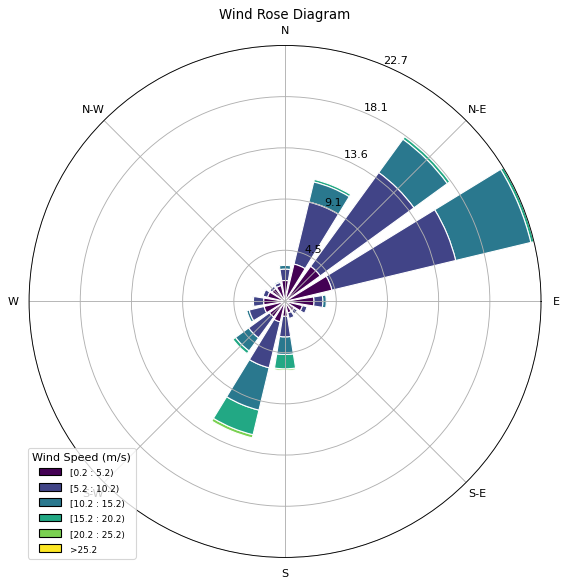

In [134]:
# Wind rose (direction analysis)
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['Wind Direction (°)'] , df['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose Diagram')

- This is a wind rose diagram, which visually represents the distribution of wind speed and direction. Here's an interpretation:

1. **Directions**: The diagram is divided into compass directions (N, NE, E, etc.), which show the direction from which the wind is blowing.

2. **Wind Speed**: The different colored segments correspond to various wind speed ranges, as indicated in the legend. The colors range from dark blue (0.2–5.2 m/s) to yellow (>25.2 m/s).

3. **Frequency**: The length of each segment indicates the frequency of winds coming from that direction. Longer segments denote more frequent winds.

4. **Observation**: In this diagram, winds from the N and NE are the most prevalent, with a higher frequency of moderate speeds (up to about 15.2 m/s). Eastern directions also show significant wind activity.

5. **Values**: The concentric circles represent proportional values, with outer circles indicating higher frequencies.

- Overall, the wind predominantly comes from the north and northeast directions, with varying speeds mostly within the lower to moderate range.

## 5. Feature Engineering

- Time-based features:


In [135]:
df['Hour'] = df.index.hour
df['Month'] = df.index.month

- Lag features (for time-series forecasting):


In [136]:
df['WindSpeed_lag1'] = df['Wind Speed (m/s)'].shift(1)  # Previous 10-min wind speed

-  Turbhine efficiency


In [141]:
df['Efficiency (%)'] = (df['LV ActivePower (kW)'] / df['Theoretical_Power_Curve (KWh)']) * 100

In [147]:
df.head(3)

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Hour,Month,WindSpeed_lag1,Efficiency (%)
Date/Time,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1,NaN,91.285468
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1,5.311336,87.277152
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1,5.672167,78.377226


In [150]:
import numpy as np

# Check for rows with positive infinite values in 'Efficiency (%)'
infinite_values_pos = df[df['Efficiency (%)'] == np.inf]

# Check for rows with negative infinite values in 'Efficiency (%)'
infinite_values_neg = df[df['Efficiency (%)'] == -np.inf]

# Display the rows with infinite values
print("Rows with positive infinite values:")
print(infinite_values_pos)

print("\nRows with negative infinite values:")
print(infinite_values_neg)


Rows with positive infinite values:
                     LV ActivePower (kW)  Wind Speed (m/s)  \
Date/Time                                                    
2018-05-01 08:20:00             4.355070          2.853813   
2018-08-01 10:00:00             8.484796          2.791786   
2018-08-01 10:30:00            26.924271          2.927467   
2018-08-01 11:00:00            12.820010          2.897459   
2018-08-01 11:10:00            17.849581          2.732267   
...                                  ...               ...   
2018-12-16 21:20:00            13.617390          2.919441   
2018-12-17 08:10:00             1.672264          2.331636   
2018-12-17 19:20:00             0.576534          2.815365   
2018-12-21 05:40:00            20.305180          2.648756   
2018-12-21 05:50:00             4.730608          2.157747   

                     Theoretical_Power_Curve (KWh)  Wind Direction (°)  Hour  \
Date/Time                                                                    

In [151]:
zero_values = df[df['Theoretical_Power_Curve (KWh)'] == 0]
print(zero_values)

                     LV ActivePower (kW)  Wind Speed (m/s)  \
Date/Time                                                    
2018-03-01 16:10:00                  0.0          2.142016   
2018-03-01 16:20:00                  0.0          2.501406   
2018-03-01 16:30:00                  0.0          2.668578   
2018-04-01 12:40:00                  0.0          2.888112   
2018-04-01 12:50:00                  0.0          2.386636   
...                                  ...               ...   
2018-12-31 12:20:00                  0.0          2.722504   
2018-12-31 12:30:00                  0.0          2.869853   
2018-12-31 13:10:00                  0.0          2.998981   
2018-12-31 13:20:00                  0.0          2.647908   
2018-12-31 13:30:00                  0.0          2.796982   

                     Theoretical_Power_Curve (KWh)  Wind Direction (°)  Hour  \
Date/Time                                                                      
2018-03-01 16:10:00              

In [154]:
df_clean = df[df['Theoretical_Power_Curve (KWh)'] != 0]

<Figure size 640x480 with 0 Axes>

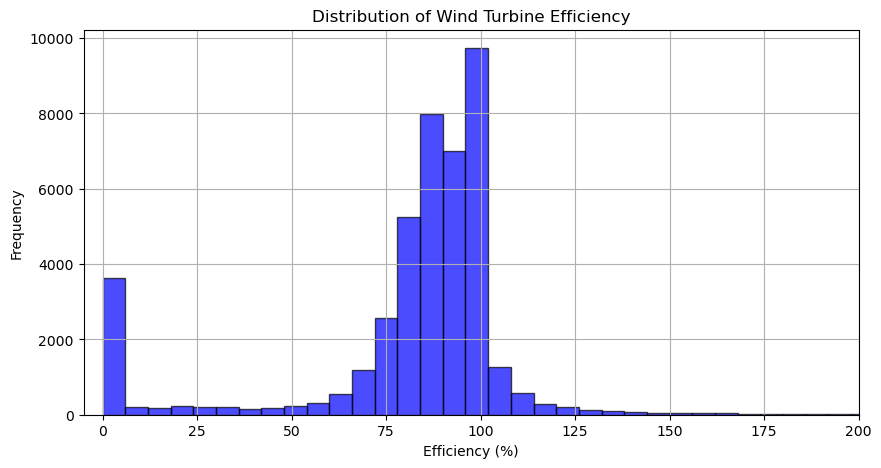

In [162]:
import numpy as np
import matplotlib.pyplot as plt

# Replace infinite values with NaN in 'Efficiency (%)' column
df['Efficiency (%)'] = df['Efficiency (%)'].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN in the 'Efficiency (%)' column and create a copy
df_clean = df.dropna(subset=['Efficiency (%)']).copy()

# Use .loc to modify the 'Efficiency (%)' column and clip values to the range between 0 and 300
df_clean.loc[:, 'Efficiency (%)'] = df_clean['Efficiency (%)'].clip(lower=0, upper=300)

# Clear any previous figures (to avoid multiple plots being shown)
plt.clf()

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the histogram with bins, color, and other styling
plt.hist(df_clean['Efficiency (%)'], bins=50, color='blue', alpha=0.7, edgecolor='black')

# Label the axes and add a title
plt.xlabel('Efficiency (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Turbine Efficiency')

# Set x-axis limit between 0 and 300
plt.xlim(-5, 200)

# Display grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()


## 6. Modeling Example: Power Output Prediction

### A. Prepare Data



In [164]:
df.head(3)

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Hour,Month,WindSpeed_lag1,Efficiency (%)
Date/Time,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1,NaN,91.285468
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1,5.311336,87.277152
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1,5.672167,78.377226


In [165]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Features and target
features = ['Wind Speed (m/s)', 'Wind Direction (°)', 'Hour', 'Month']
target = 'LV ActivePower (kW)'
X = df[features].dropna()
y = df[target].loc[X.index]

# Split data (time-series split recommended, but simple split for demo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## B. Train Model



In [166]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

## C. Evaluate



In [167]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f} kWh")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

MAE: 196.00 kW
R²: 0.89


## 7. Advanced Analysis: Anomaly Detection

- Identify underperforming turbines using the theoretical power curve:



In [174]:
import warnings

# Suppress the specific UserWarning without importing from sklearn
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names*")

# Now run your original code (no need to repeat the model fitting)
model_anomaly = IsolationForest(contamination=0.05, random_state=42)
anomalies = model_anomaly.fit_predict(X)
df['Anomaly'] = anomalies

# Count anomalies
num_anomalies = (df['Anomaly'] == -1).sum()
print(f"Number of anomalies detected: {num_anomalies}")

# Inspect anomalous rows
anomalous_data = df[df['Anomaly'] == -1]
print(anomalous_data[['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Power_Deviation']])


Number of anomalies detected: 2523
                     LV ActivePower (kW)  Wind Speed (m/s)  Power_Deviation
Date/Time                                                                  
2018-02-01 13:00:00          1278.895020          9.072307      -911.809744
2018-04-01 06:00:00          1512.972046          7.678398       161.410859
2018-04-01 15:30:00             0.000000          6.778621      -919.369570
2018-04-01 20:20:00          1418.631958          7.423740       199.866526
2018-09-01 20:20:00           786.770325          5.817975       221.476674
...                                  ...               ...              ...
2018-12-31 20:30:00          1433.415039          7.493729       178.686389
2018-12-31 20:40:00          1550.709961          7.724678       174.214838
2018-12-31 21:40:00          1992.348999          8.433422       205.248662
2018-12-31 23:20:00          1684.353027          7.332648       511.297256
2018-12-31 23:30:00          2201.106934          8.4

## 8. Visualize Results


- Anomalies in Power Output





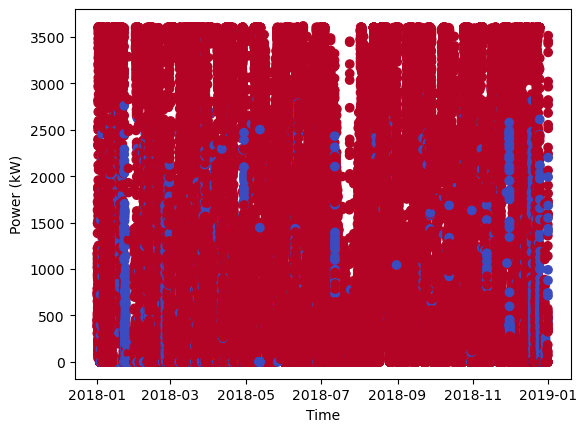

In [175]:
plt.scatter(df.index, df['LV ActivePower (kW)'], c=df['Anomaly'], cmap='coolwarm')
plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.show()

This scatter plot displays power data over time with a focus on anomalies. Here’s a breakdown of the plot:

- **X-axis (Time):** Represents the time period from early 2018 to early 2019.
- **Y-axis (Power in kW):** Shows the active power values ranging from 0 to 3500 kW.
- **Colors:** Data points are colored based on anomalies, using the 'coolwarm' colormap. Typically, one color (such as red) indicates normal data points, while another (such as blue) signifies anomalies.

The graph suggests a fairly consistent power usage with scattered occurrences of anomalies identified throughout the year. These anomalies could represent unexpected power surges, drops, or other irregularities captured in the data.

## 1. Power Deficit Calculation

In [191]:
# Create a copy of the original DataFrame to avoid modifying the original data
df1 = df.copy()

# Calculate the power deficit percentage using the formula:
# (Measured LV Active Power - Theoretical Power Curve) / Theoretical Power Curve * 100
power_deficit_percentage = 100 * (df1['LV ActivePower (kW)'] - df1['Theoretical_Power_Curve (KWh)']) / df1['Theoretical_Power_Curve (KWh)']

# Insert the calculated power deficit percentage as a new column at the 4th position
df1.insert(4, 'power_deficit_percentage', power_deficit_percentage)

# Handle cases where the theoretical power is zero to avoid division errors
# If 'Theoretical_Power_Curve (KWh)' is 0, set 'power_deficit_percentage' to 0
df1.loc[df1['Theoretical_Power_Curve (KWh)'] == 0, 'power_deficit_percentage'] = 0

# Define a threshold for acceptable power deficit percentage (e.g., ±10%)
threshold = 10  

# Assign a turbine status:
# - 1 (OK) if the power deficit is within the threshold range (-10% to +10%)
# - 0 (Not OK) if the power deficit exceeds ±10%
condition_ok = (df1["power_deficit_percentage"] < threshold) & (df1["power_deficit_percentage"] > -threshold)
df1.loc[condition_ok, "turbine_status"] = 1  # Turbine is working close to theoretical power

condition_not_ok = (df1["power_deficit_percentage"] > threshold) | (df1["power_deficit_percentage"] < -threshold)
df1.loc[condition_not_ok, "turbine_status"] = 0  # Turbine is not working close to theoretical power

# Display the final DataFrame
df1.head(3)


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),power_deficit_percentage,turbine_status
Date/Time,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,-8.714532,1.0
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,-12.722848,0.0
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,-21.622774,0.0


*  The turbine_status column is a binary classification label that indicates whether a wind turbine is operating efficiently or inefficiently based on its power deficit percentage.



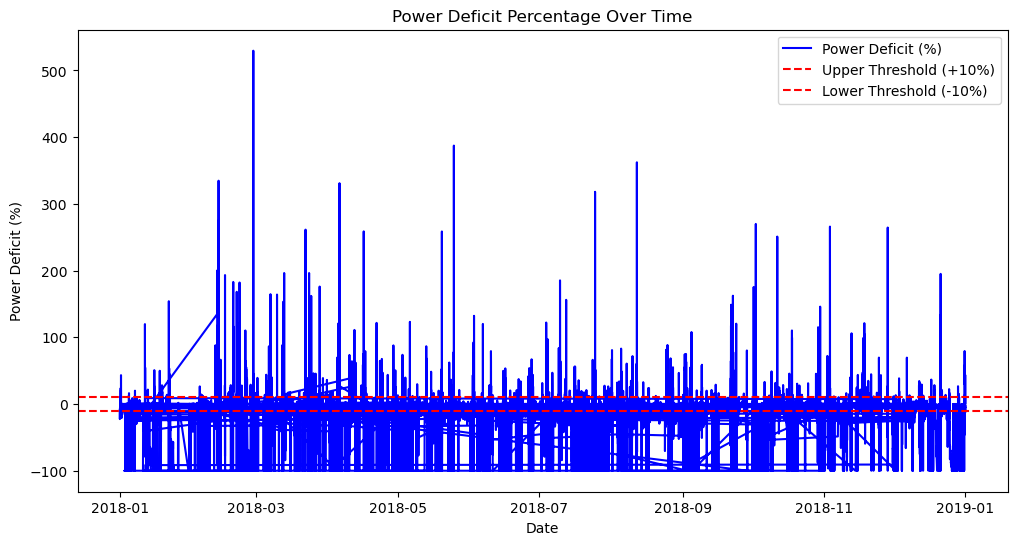

In [192]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1["power_deficit_percentage"], label="Power Deficit (%)", color="blue")
plt.axhline(y=10, color='r', linestyle='dashed', label="Upper Threshold (+10%)")
plt.axhline(y=-10, color='r', linestyle='dashed', label="Lower Threshold (-10%)")

plt.title("Power Deficit Percentage Over Time")
plt.xlabel("Date")
plt.ylabel("Power Deficit (%)")
plt.legend()
plt.show()


Power deficit percentage is a measure used to quantify the discrepancy between the actual power output of a wind turbine or power generation system and its expected output. This metric is significant for several reasons:

1. **Performance Monitoring:**
   - It helps in assessing the efficiency and performance of a power generation system. A higher power deficit percentage indicates lower efficiency and potential issues with the equipment.

2. **Maintenance and Troubleshooting:**
   - Regular monitoring of power deficit percentages can signal when maintenance is needed. An increasing trend in the deficit might suggest mechanical issues, wear and tear, or the need for calibration.

3. **Optimization of Operations:**
   - By understanding when and why power deficits occur, operators can optimize settings and operations to improve output. This could involve adjusting turbine angles, implementing software updates, or changing maintenance schedules.

4. **Financial Implications:**
   - Power deficits directly affect revenue, especially for renewable energy companies that sell power. Understanding and minimizing deficits ensures better financial performance and stability.

5. **Grid Reliability:**
   - Inconsistencies in power output can impact the reliability of the power supply to the grid. Keeping the power deficit low ensures a stable and reliable electricity supply to customers.

6. **Benchmarking and Reporting:**
   - Quantifying power deficits allows companies to benchmark performance against industry standards or regulatory requirements. It also aids in transparent reporting to stakeholders about the efficiency and sustainability of energy operations.

7. **Environmental Impact:**
   - Efficient power generation systems with lower power deficits contribute less to environmental degradation, as they make optimal use of available resources, minimizing waste and emissions.

Overall, power deficit percentage is a critical metric for understanding the effectiveness, reliability, and financial viability of power generation operations, particularly in renewable energy sectors like wind power.

### Scatter Plot
- Best for identifying clusters of performance.

- X-axis: Theoretical_Power_Curve (KWh)
- Y-axis: LV ActivePower (kW)
- Color by turbine_status (0 = red, 1 = green).

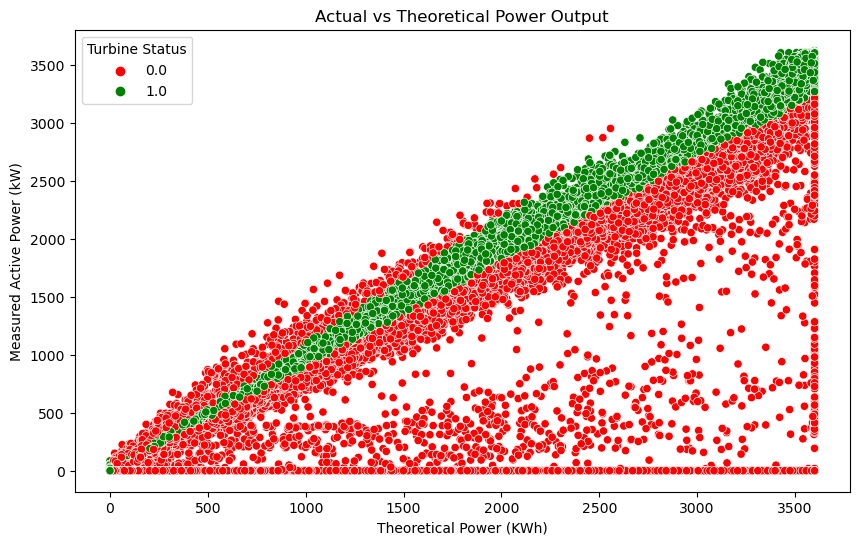

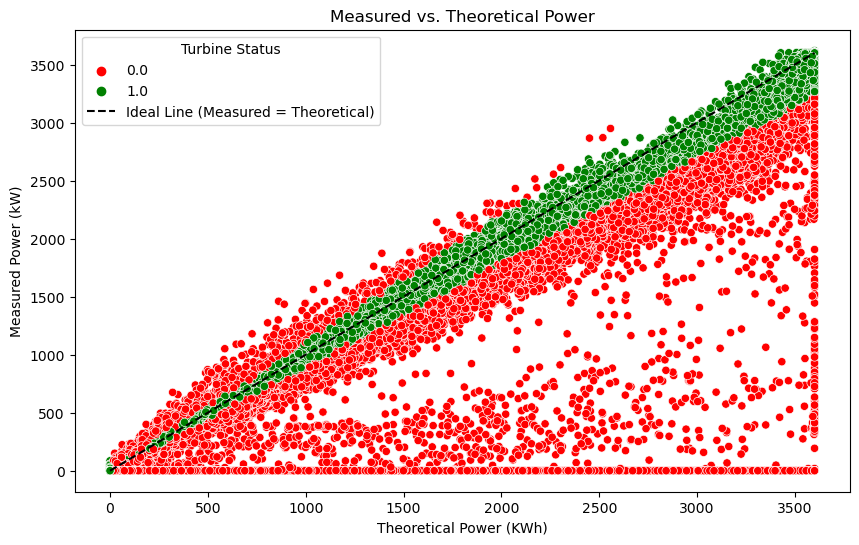

In [203]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x="Theoretical_Power_Curve (KWh)", y="LV ActivePower (kW)", hue="turbine_status", palette={0: "red", 1: "green"})

plt.title("Actual vs Theoretical Power Output")
plt.xlabel("Theoretical Power (KWh)")
plt.ylabel("Measured Active Power (kW)")
plt.legend(title="Turbine Status")
plt.show()




plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x="Theoretical_Power_Curve (KWh)", y="LV ActivePower (kW)", hue="turbine_status", palette={0: "red", 1: "green"})

plt.plot([df1["Theoretical_Power_Curve (KWh)"].min(), df1["Theoretical_Power_Curve (KWh)"].max()],
         [df1["Theoretical_Power_Curve (KWh)"].min(), df1["Theoretical_Power_Curve (KWh)"].max()], 
         color='black', linestyle='dashed', label="Ideal Line (Measured = Theoretical)")

plt.title("Measured vs. Theoretical Power")
plt.xlabel("Theoretical Power (KWh)")
plt.ylabel("Measured Power (kW)")
plt.legend(title="Turbine Status")
plt.show()



### Analysis from the Plot

In the provided plot:

- **X-axis (Theoretical Power)**: Represents the expected power output based on ideal conditions.
- **Y-axis (Measured Active Power)**: Represents the actual power output measured.
- **Color Coding (Turbine Status)**: Differentiates states or conditions of the turbine, which might affect performance.

From the scatter plot:
- The spread of red and green points indicates variability in performance. Points lying below the diagonal line (if drawn from the origin at 45 degrees) show a power deficit.
- The clustering of colors suggests how specific turbine statuses affect performance.

Understanding this graph involves analyzing the deviations of measured power from theoretical power, helping in diagnosing and tuning system performance.

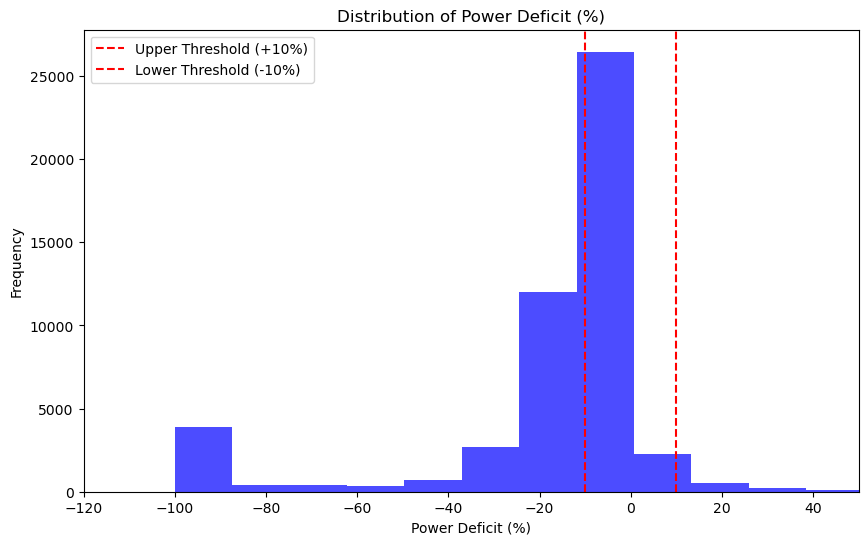

In [199]:
plt.figure(figsize=(10, 6))
plt.hist(df1["power_deficit_percentage"], bins=50, color='blue', alpha=0.7)
plt.axvline(x=10, color='r', linestyle='dashed', label="Upper Threshold (+10%)")
plt.axvline(x=-10, color='r', linestyle='dashed', label="Lower Threshold (-10%)")
plt.xlim(-120, 50)
plt.title("Distribution of Power Deficit (%)")
plt.xlabel("Power Deficit (%)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


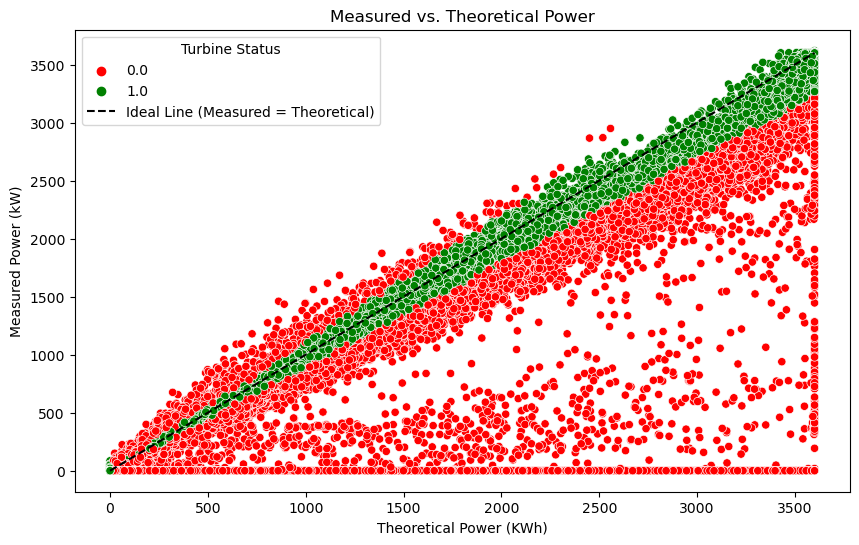

In [202]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x="Theoretical_Power_Curve (KWh)", y="LV ActivePower (kW)", hue="turbine_status", palette={0: "red", 1: "green"})

plt.plot([df1["Theoretical_Power_Curve (KWh)"].min(), df1["Theoretical_Power_Curve (KWh)"].max()],
         [df1["Theoretical_Power_Curve (KWh)"].min(), df1["Theoretical_Power_Curve (KWh)"].max()], 
         color='black', linestyle='dashed', label="Ideal Line (Measured = Theoretical)")

plt.title("Measured vs. Theoretical Power")
plt.xlabel("Theoretical Power (KWh)")
plt.ylabel("Measured Power (kW)")
plt.legend(title="Turbine Status")
plt.show()


 # Multiple Models for Turbine Status Prediction

In [204]:
df2.head(3) 

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),power_deficit_percentage,turbine_status
Date/Time,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,-8.714532,1.0
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,-12.722848,0.0
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,-21.622774,0.0



🔹 Training Model: Logistic Regression...

🔹 Logistic Regression Performance:
✅ Accuracy: 0.9183
✅ Precision: 0.9261
✅ Recall: 0.9131
✅ F1 Score: 0.9196


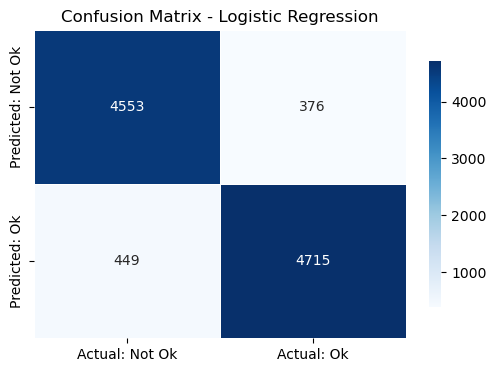


🔹 Training Model: Random Forest...

🔹 Random Forest Performance:
✅ Accuracy: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000
✅ F1 Score: 1.0000


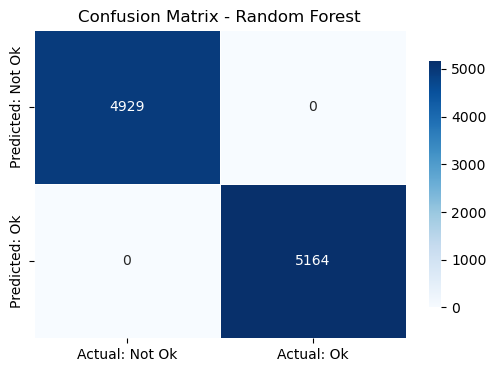


🔹 Training Model: Gradient Boosting...

🔹 Gradient Boosting Performance:
✅ Accuracy: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000
✅ F1 Score: 1.0000


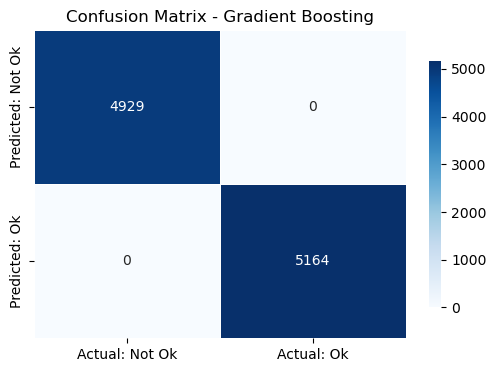


🔹 Training Model: K-Nearest Neighbors...

🔹 K-Nearest Neighbors Performance:
✅ Accuracy: 0.9851
✅ Precision: 0.9857
✅ Recall: 0.9853
✅ F1 Score: 0.9855


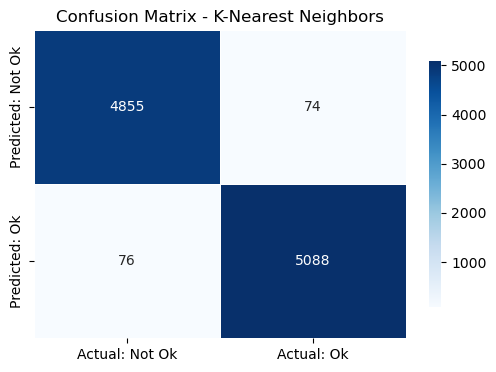


🔹 Training SVM Model with linear Kernel...

🔹 SVM (linear) Performance:
✅ Accuracy: 0.9425
✅ Precision: 0.9354
✅ Recall: 0.9535
✅ F1 Score: 0.9444


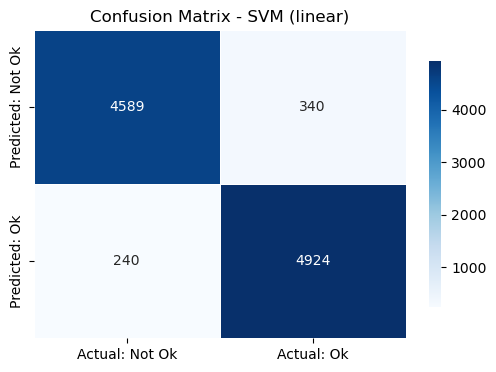


🔹 Training SVM Model with poly Kernel...

🔹 SVM (poly) Performance:
✅ Accuracy: 0.9251
✅ Precision: 0.9630
✅ Recall: 0.8877
✅ F1 Score: 0.9238


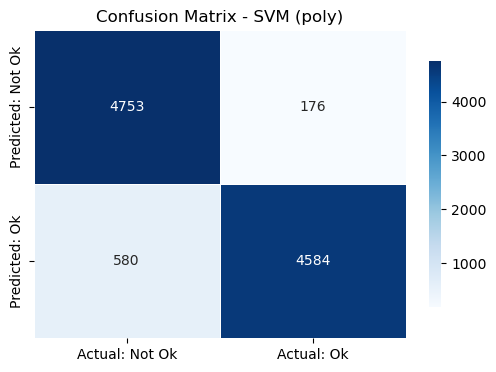


🔹 Training SVM Model with rbf Kernel...

🔹 SVM (rbf) Performance:
✅ Accuracy: 0.9886
✅ Precision: 0.9867
✅ Recall: 0.9911
✅ F1 Score: 0.9889


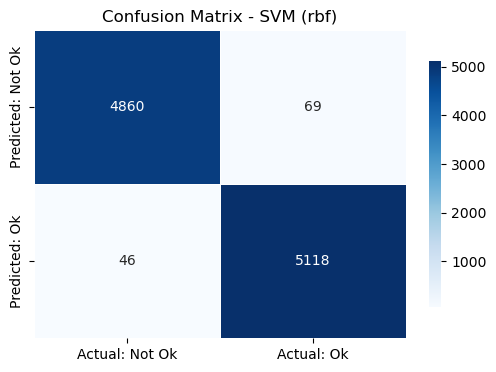


🔹 Training SVM Model with sigmoid Kernel...

🔹 SVM (sigmoid) Performance:
✅ Accuracy: 0.5925
✅ Precision: 0.6040
✅ Recall: 0.5908
✅ F1 Score: 0.5974


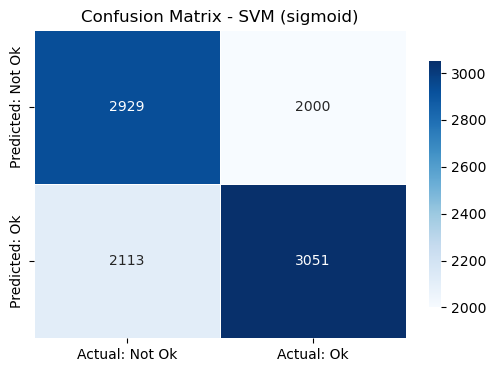


🔹 Summary of Model Performances:


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.918260,0.926144,0.913052,0.919551
Random Forest,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,1.000000,1.000000,1.000000,1.000000
K-Nearest Neighbors,0.985138,0.985664,0.985283,0.985474
SVM (linear),0.942534,0.935410,0.953524,0.944381
SVM (poly),0.925097,0.963025,0.887684,0.923821
SVM (rbf),0.988606,0.986698,0.991092,0.988890
SVM (sigmoid),0.592490,0.604039,0.590821,0.597357


In [208]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
)

# Import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Prepare features (X) and target variable (y) from df1
X = df1.drop(columns=["turbine_status"])  # Features
y = df1["turbine_status"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize feature values (important for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store model performance summary
model_performance = {}

# Function to compute performance metrics
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    model_performance[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Print performance metrics
    print(f"\n\033[1m🔹 {model_name} Performance:\033[0m")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1 Score: {f1:.4f}")

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)

    # Create a DataFrame for better visualization
    cm_matrix = pd.DataFrame(
        cm, 
        columns=['Actual: Not Ok', 'Actual: Ok'], 
        index=['Predicted: Not Ok', 'Predicted: Ok']
    )

    # Set a custom color palette
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap="Blues", linewidths=.5, cbar_kws={"shrink": 0.8})

    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔹 Training Model: {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate model performance
    evaluate_model(y_test, y_pred, name)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, name)


# ============================== SVM MODELS (Different Kernels) ==============================
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print(f"\n🔹 Training SVM Model with {kernel} Kernel...")
    
    # Instantiate classifier with the specified kernel
    svc = SVC(kernel=kernel)

    # Fit classifier to training set
    svc.fit(X_train, y_train)

    # Make predictions on test set
    y_pred = svc.predict(X_test)

    # Evaluate model performance
    evaluate_model(y_test, y_pred, f"SVM ({kernel})")

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, f"SVM ({kernel})")


# ============================== SUMMARY TABLE FOR ALL MODELS ==============================
summary_df = pd.DataFrame(model_performance).T

# Display final summary of all models
print("\n\033[1m🔹 Summary of Model Performances:\033[0m")
display(summary_df.style.background_gradient(cmap="coolwarm"))



🔹 Training Model: Logistic Regression...

🔹 Logistic Regression Performance:
✅ Accuracy: 0.9183
✅ Precision: 0.9261
✅ Recall: 0.9131
✅ F1 Score: 0.9196


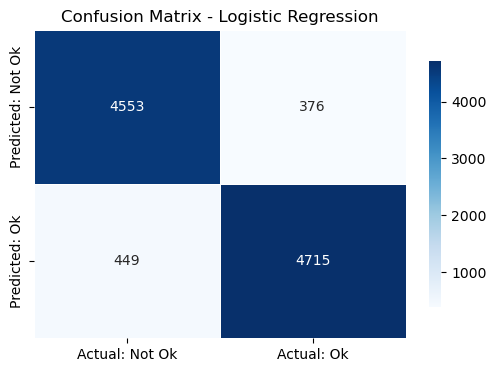


🔹 Training Model: Random Forest...

🔹 Random Forest Performance:
✅ Accuracy: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000
✅ F1 Score: 1.0000


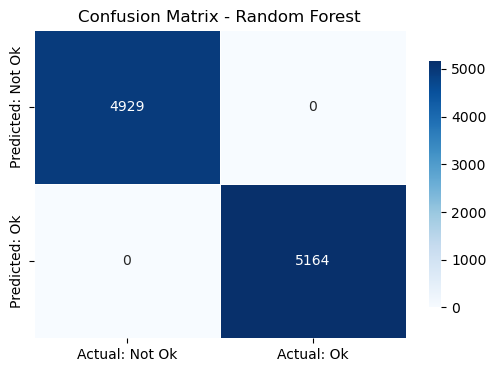


🔹 Training Model: Gradient Boosting...

🔹 Gradient Boosting Performance:
✅ Accuracy: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000
✅ F1 Score: 1.0000


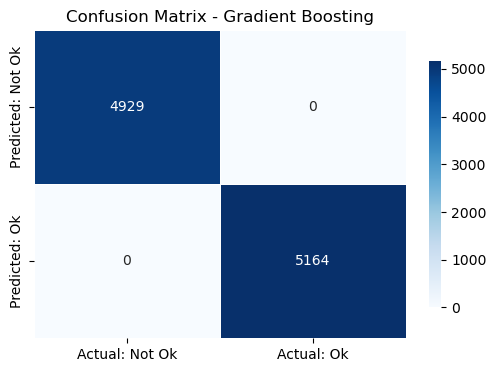


🔹 Training Model: K-Nearest Neighbors...

🔹 K-Nearest Neighbors Performance:
✅ Accuracy: 0.9851
✅ Precision: 0.9857
✅ Recall: 0.9853
✅ F1 Score: 0.9855


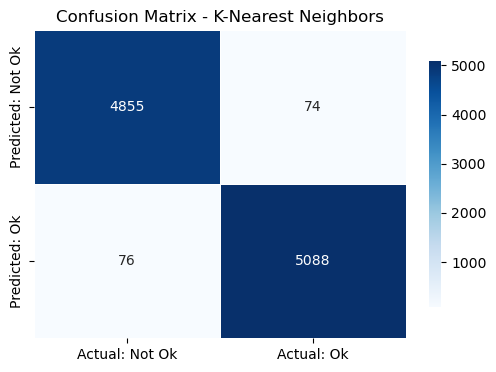


🔹 Training SVM Model with linear Kernel...

🔹 SVM (linear) Performance:
✅ Accuracy: 0.9425
✅ Precision: 0.9354
✅ Recall: 0.9535
✅ F1 Score: 0.9444


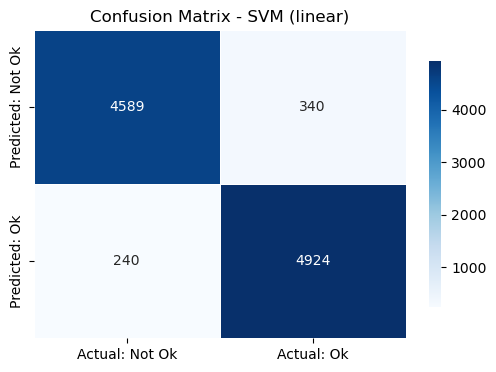


🔹 Training SVM Model with poly Kernel...

🔹 SVM (poly) Performance:
✅ Accuracy: 0.9251
✅ Precision: 0.9630
✅ Recall: 0.8877
✅ F1 Score: 0.9238


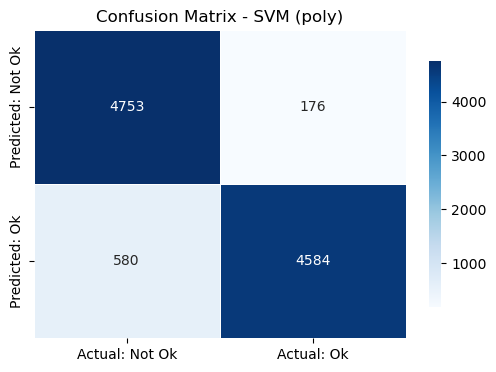


🔹 Training SVM Model with rbf Kernel...

🔹 SVM (rbf) Performance:
✅ Accuracy: 0.9886
✅ Precision: 0.9867
✅ Recall: 0.9911
✅ F1 Score: 0.9889


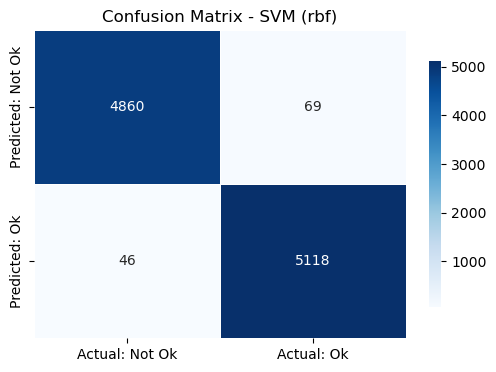


🔹 Training SVM Model with sigmoid Kernel...

🔹 SVM (sigmoid) Performance:
✅ Accuracy: 0.5925
✅ Precision: 0.6040
✅ Recall: 0.5908
✅ F1 Score: 0.5974


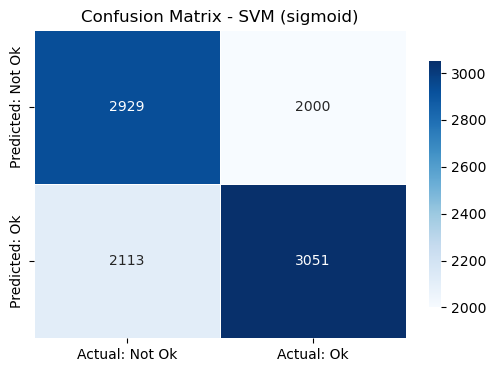


🔹 Feature Importance (Random Forest & Gradient Boosting):


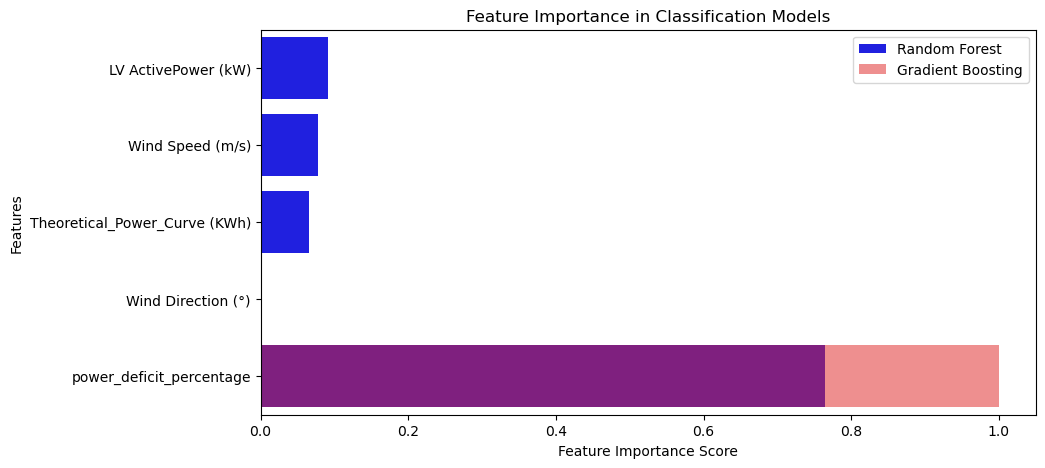


🔹 Hyperparameter Tuning for Random Forest...
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.9999752291305425


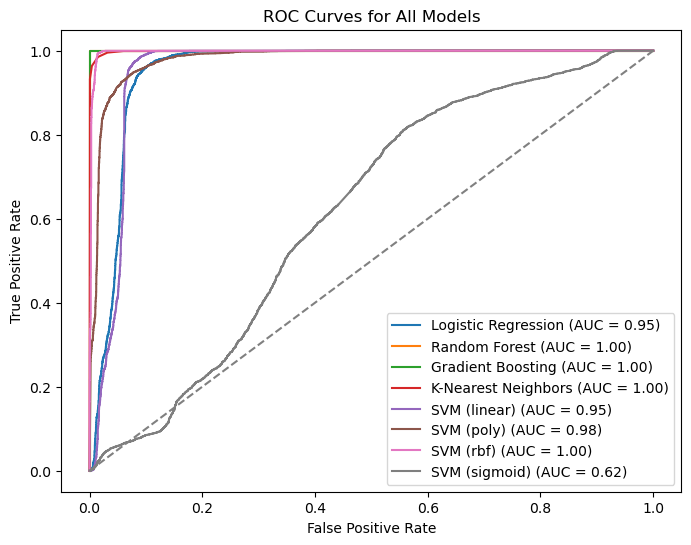


🔹 Summary of Model Performances:


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.918260,0.926144,0.913052,0.919551
Random Forest,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,1.000000,1.000000,1.000000,1.000000
K-Nearest Neighbors,0.985138,0.985664,0.985283,0.985474
SVM (linear),0.942534,0.935410,0.953524,0.944381
SVM (poly),0.925097,0.963025,0.887684,0.923821
SVM (rbf),0.988606,0.986698,0.991092,0.988890
SVM (sigmoid),0.592490,0.604039,0.590821,0.597357


In [209]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

# Import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Prepare features (X) and target variable (y)
X = df1.drop(columns=["turbine_status"])  # Features
y = df1["turbine_status"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize feature values (important for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store model performance
model_performance = {}
roc_curves = {}

# Function to evaluate each model
def evaluate_model(y_test, y_pred, model_name, model):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    model_performance[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Compute ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_curves[model_name] = (fpr, tpr, auc(fpr, tpr))

    print(f"\n\033[1m🔹 {model_name} Performance:\033[0m")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1 Score: {f1:.4f}")

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)

    cm_matrix = pd.DataFrame(
        cm, 
        columns=['Actual: Not Ok', 'Actual: Ok'], 
        index=['Predicted: Not Ok', 'Predicted: Ok']
    )

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap="Blues", linewidths=.5, cbar_kws={"shrink": 0.8})

    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔹 Training Model: {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate model performance
    evaluate_model(y_test, y_pred, name, model)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, name)


# ============================== SVM MODELS (Different Kernels) ==============================
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print(f"\n🔹 Training SVM Model with {kernel} Kernel...")
    
    # Instantiate classifier with the specified kernel
    svc = SVC(kernel=kernel, probability=True)

    # Fit classifier to training set
    svc.fit(X_train, y_train)

    # Make predictions on test set
    y_pred = svc.predict(X_test)

    # Evaluate model performance
    evaluate_model(y_test, y_pred, f"SVM ({kernel})", svc)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, f"SVM ({kernel})")


# ============================== FEATURE IMPORTANCE ==============================
print("\n🔹 Feature Importance (Random Forest & Gradient Boosting):")
rf_feature_importance = models["Random Forest"].feature_importances_
gb_feature_importance = models["Gradient Boosting"].feature_importances_

feature_names = df1.drop(columns=["turbine_status"]).columns

plt.figure(figsize=(10, 5))
sns.barplot(x=rf_feature_importance, y=feature_names, color="blue", label="Random Forest")
sns.barplot(x=gb_feature_importance, y=feature_names, color="red", alpha=0.5, label="Gradient Boosting")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Classification Models")
plt.legend()
plt.show()


# ============================== HYPERPARAMETER TUNING ==============================
print("\n🔹 Hyperparameter Tuning for Random Forest...")

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


# ============================== PLOT ROC CURVES ==============================
plt.figure(figsize=(8, 6))

for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()


# ============================== SUMMARY TABLE ==============================
summary_df = pd.DataFrame(model_performance).T

print("\n\033[1m🔹 Summary of Model Performances:\033[0m")
display(summary_df.style.background_gradient(cmap="coolwarm"))



🔹 Training Model: Logistic Regression...

🔹 Logistic Regression Performance:
✅ Accuracy: 0.9183
✅ Precision: 0.9261
✅ Recall: 0.9131
✅ F1 Score: 0.9196


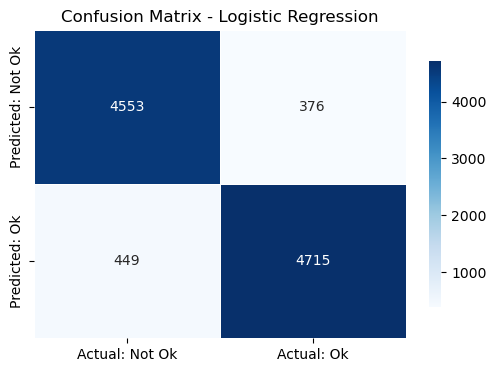


🔹 Training Model: Random Forest...

🔹 Random Forest Performance:
✅ Accuracy: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000
✅ F1 Score: 1.0000


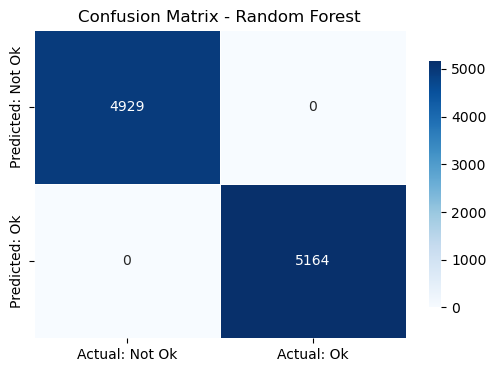


🔹 Training Model: Gradient Boosting...

🔹 Gradient Boosting Performance:
✅ Accuracy: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000
✅ F1 Score: 1.0000


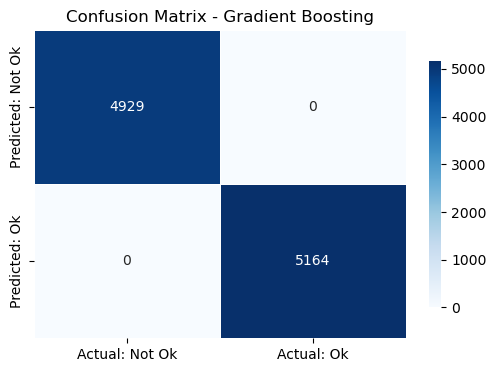


🔹 Training Model: K-Nearest Neighbors...

🔹 K-Nearest Neighbors Performance:
✅ Accuracy: 0.9851
✅ Precision: 0.9857
✅ Recall: 0.9853
✅ F1 Score: 0.9855


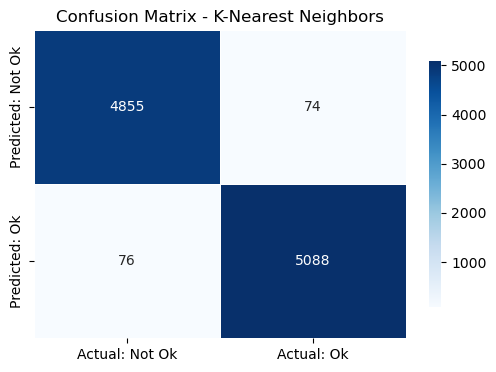


🔹 Training SVM Model with linear Kernel...

🔹 SVM (linear) Performance:
✅ Accuracy: 0.9425
✅ Precision: 0.9354
✅ Recall: 0.9535
✅ F1 Score: 0.9444


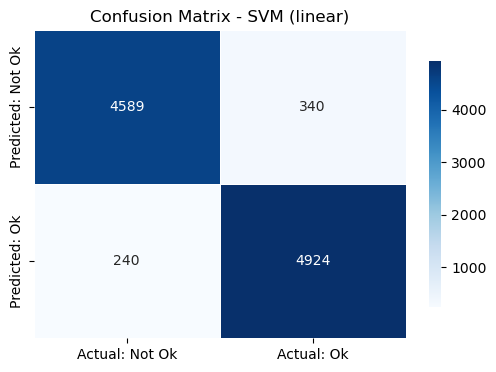


🔹 Training SVM Model with poly Kernel...

🔹 SVM (poly) Performance:
✅ Accuracy: 0.9251
✅ Precision: 0.9630
✅ Recall: 0.8877
✅ F1 Score: 0.9238


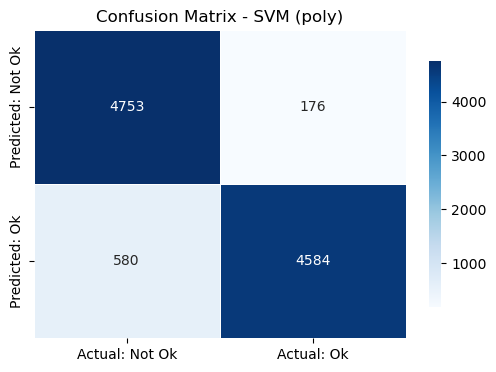


🔹 Training SVM Model with rbf Kernel...

🔹 SVM (rbf) Performance:
✅ Accuracy: 0.9886
✅ Precision: 0.9867
✅ Recall: 0.9911
✅ F1 Score: 0.9889


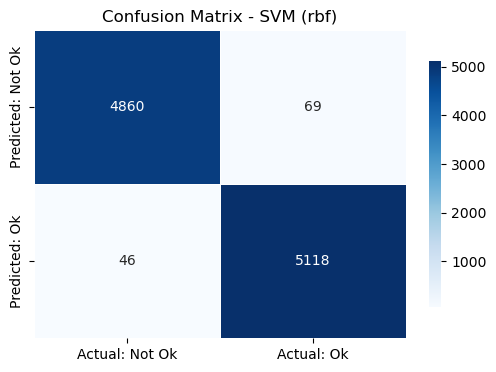


🔹 Training SVM Model with sigmoid Kernel...

🔹 SVM (sigmoid) Performance:
✅ Accuracy: 0.5925
✅ Precision: 0.6040
✅ Recall: 0.5908
✅ F1 Score: 0.5974


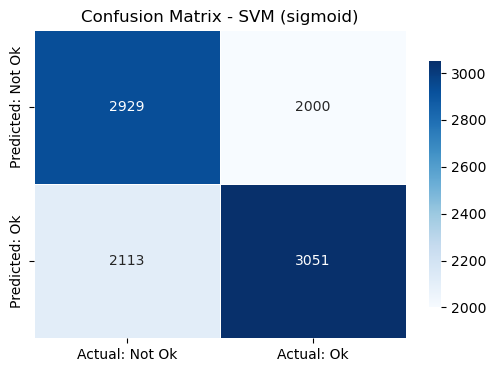

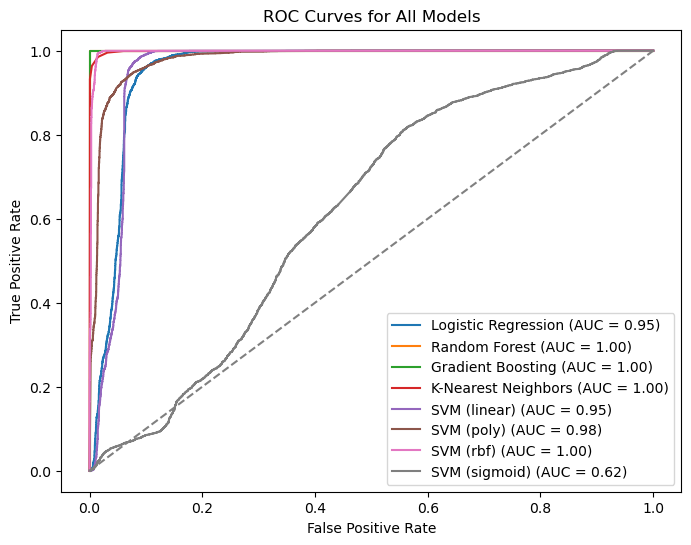


🔹 Summary of Model Performances:


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.918260,0.926144,0.913052,0.919551
Random Forest,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,1.000000,1.000000,1.000000,1.000000
K-Nearest Neighbors,0.985138,0.985664,0.985283,0.985474
SVM (linear),0.942534,0.935410,0.953524,0.944381
SVM (poly),0.925097,0.963025,0.887684,0.923821
SVM (rbf),0.988606,0.986698,0.991092,0.988890
SVM (sigmoid),0.592490,0.604039,0.590821,0.597357


In [213]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Prepare features (X) and target variable (y) from df1
X = df1.drop(columns=["turbine_status"])  # Features
y = df1["turbine_status"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize feature values (important for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store model performance summary
model_performance = {}
roc_curves = {}

# Function to compute performance metrics
def evaluate_model(y_test, y_pred, model_name, model=None):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    model_performance[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Compute ROC Curve and AUC
    if model:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_curves[model_name] = (fpr, tpr, auc(fpr, tpr))

    # Print performance metrics
    print(f"\n\033[1m🔹 {model_name} Performance:\033[0m")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1 Score: {f1:.4f}")

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)

    # Create a DataFrame for better visualization
    cm_matrix = pd.DataFrame(
        cm, 
        columns=['Actual: Not Ok', 'Actual: Ok'], 
        index=['Predicted: Not Ok', 'Predicted: Ok']
    )

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap="Blues", linewidths=.5, cbar_kws={"shrink": 0.8})
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔹 Training Model: {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate model performance
    evaluate_model(y_test, y_pred, name, model)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, name)

# ============================== SVM MODELS (Different Kernels) ==============================
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print(f"\n🔹 Training SVM Model with {kernel} Kernel...")
    
    # Instantiate classifier with the specified kernel
    svc = SVC(kernel=kernel, probability=True)

    # Fit classifier to training set
    svc.fit(X_train, y_train)

    # Make predictions on test set
    y_pred = svc.predict(X_test)

    # Evaluate model performance
    evaluate_model(y_test, y_pred, f"SVM ({kernel})", svc)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, f"SVM ({kernel})")

# ============================== PLOT ROC CURVES ==============================
plt.figure(figsize=(8, 6))

for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()

# ============================== SUMMARY TABLE FOR ALL MODELS ==============================
summary_df = pd.DataFrame(model_performance).T

# Display final summary of all models
print("\n\033[1m🔹 Summary of Model Performances:\033[0m")
display(summary_df.style.background_gradient(cmap="coolwarm"))



🔹 Feature Importance (Random Forest & Gradient Boosting):


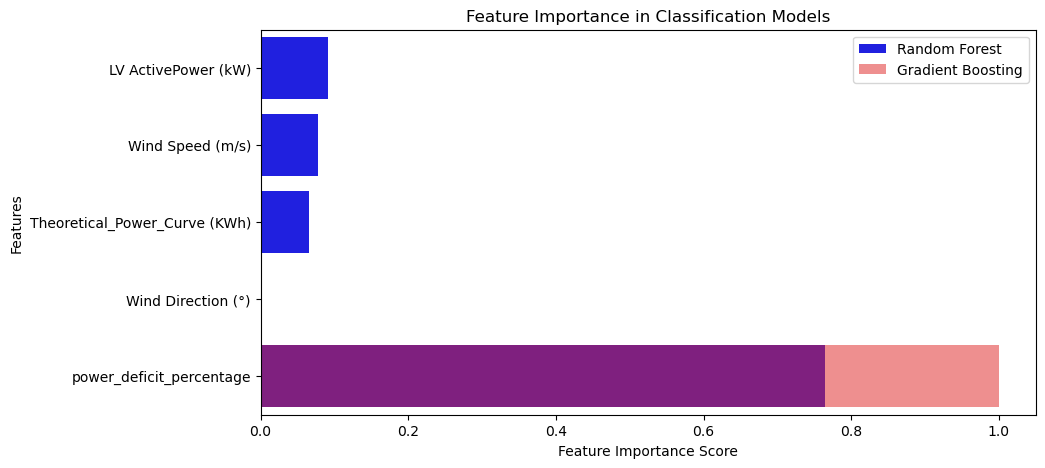


🔹 Hyperparameter Tuning for Random Forest...
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.9999752291305425


In [214]:

# ============================== FEATURE IMPORTANCE ==============================
print("\n🔹 Feature Importance (Random Forest & Gradient Boosting):")
rf_feature_importance = models["Random Forest"].feature_importances_
gb_feature_importance = models["Gradient Boosting"].feature_importances_

feature_names = df1.drop(columns=["turbine_status"]).columns

plt.figure(figsize=(10, 5))
sns.barplot(x=rf_feature_importance, y=feature_names, color="blue", label="Random Forest")
sns.barplot(x=gb_feature_importance, y=feature_names, color="red", alpha=0.5, label="Gradient Boosting")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Classification Models")
plt.legend()
plt.show()


# ============================== HYPERPARAMETER TUNING ==============================
print("\n🔹 Hyperparameter Tuning for Random Forest...")

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)




🔹 Feature Importance (Logistic Regression - Coefficients):


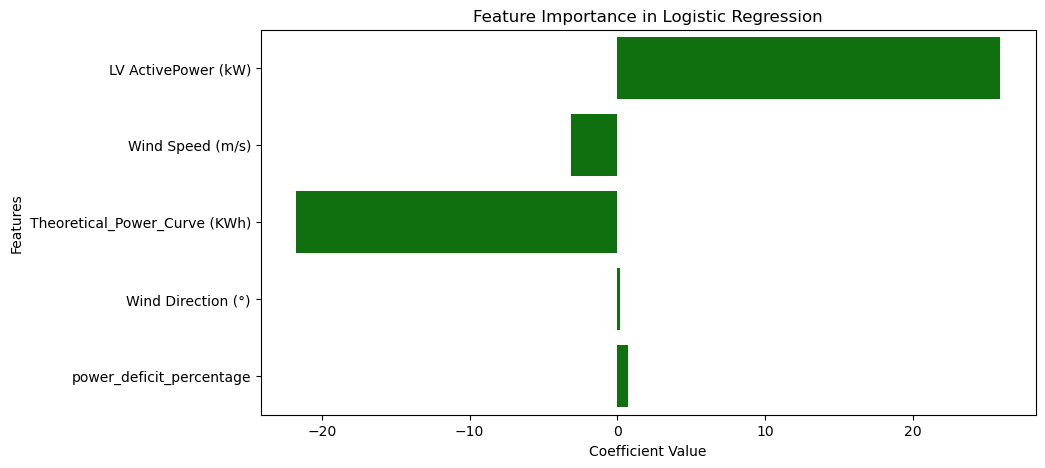

In [215]:
print("\n🔹 Feature Importance (Logistic Regression - Coefficients):")
log_reg_coefs = models["Logistic Regression"].coef_[0]

plt.figure(figsize=(10, 5))
sns.barplot(x=log_reg_coefs, y=feature_names, color="green")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance in Logistic Regression")
plt.show()


In [216]:
print("\n🔹 Hyperparameter Tuning for Gradient Boosting...")

param_grid_gb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 10]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid_gb, cv=5, scoring="accuracy")
grid_search_gb.fit(X_train, y_train)

print("Best Parameters (Gradient Boosting):", grid_search_gb.best_params_)
print("Best Accuracy:", grid_search_gb.best_score_)



🔹 Hyperparameter Tuning for Gradient Boosting...
Best Parameters (Gradient Boosting): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best Accuracy: 0.9999752291305425


In [217]:
print("\n🔹 Hyperparameter Tuning for SVM...")

param_grid_svm = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly", "sigmoid"]
}

grid_search_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring="accuracy")
grid_search_svm.fit(X_train, y_train)

print("Best Parameters (SVM):", grid_search_svm.best_params_)
print("Best Accuracy:", grid_search_svm.best_score_)



🔹 Hyperparameter Tuning for SVM...
Best Parameters (SVM): {'C': 10, 'kernel': 'rbf'}
Best Accuracy: 0.9957641813227642


In [218]:
# Create a DataFrame to store actual vs predicted values
comparison_df = pd.DataFrame({"Actual": y_test})

# Store predictions for each model
for name, model in models.items():
    comparison_df[name] = model.predict(X_test)

# Add SVM models with different kernels
for kernel in kernels:
    svc = SVC(kernel=kernel)
    svc.fit(X_train, y_train)
    comparison_df[f"SVM ({kernel})"] = svc.predict(X_test)

# Display the first few rows
print("\n🔹 Prediction vs Actual Table:")
display(comparison_df.head(10))



🔹 Prediction vs Actual Table:


,Actual,Logistic Regression,Random Forest,Gradient Boosting,K-Nearest Neighbors,SVM (linear),SVM (poly),SVM (rbf),SVM (sigmoid)
Date/Time,,,,,,,,,
2018-08-20 05:40:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-04-15 05:30:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-07-17 09:50:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-01-11 07:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-06-21 15:40:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-10-14 08:30:00,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2018-06-28 07:40:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-12-27 08:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-28 02:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
